### 2. Importing the relevant libraries

In [273]:
# Importing the relevant libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import joblib
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay,confusion_matrix , classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier




### 3. Data Understanding

In [193]:
# loading the datasets
dataFrame = pd.read_csv("Dataset/bigml_59c28831336c6604c800002a.csv")

In [194]:
# Creating a copy of the dataset to work with.
data = dataFrame.copy()
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [195]:
# checking the shape of the data
(data.shape)

(3333, 21)

In [196]:
print(f"Data has {data.shape[0]} rows and {data.shape[1]} columns")

Data has 3333 rows and 21 columns


In [197]:
# checking for information about the data Frame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [198]:
# Converting area code to object as it takes no mathematical significance.
data['area code'] = data['area code'].astype('object')

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [200]:
# checking for the unique values in the data
for i in data.columns:
    print(f"Unique values in {i} are {data[i].nunique()}")

Unique values in state are 51
Unique values in account length are 212
Unique values in area code are 3
Unique values in phone number are 3333
Unique values in international plan are 2
Unique values in voice mail plan are 2
Unique values in number vmail messages are 46
Unique values in total day minutes are 1667
Unique values in total day calls are 119
Unique values in total day charge are 1667
Unique values in total eve minutes are 1611
Unique values in total eve calls are 123
Unique values in total eve charge are 1440
Unique values in total night minutes are 1591
Unique values in total night calls are 120
Unique values in total night charge are 933
Unique values in total intl minutes are 162
Unique values in total intl calls are 21
Unique values in total intl charge are 162
Unique values in customer service calls are 10
Unique values in churn are 2


### 3. Data Cleaning.

In [201]:
#checking for duplicates in the data
print(data.duplicated().sum())

0


In [202]:
# checking for missing values in the data
print(data.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


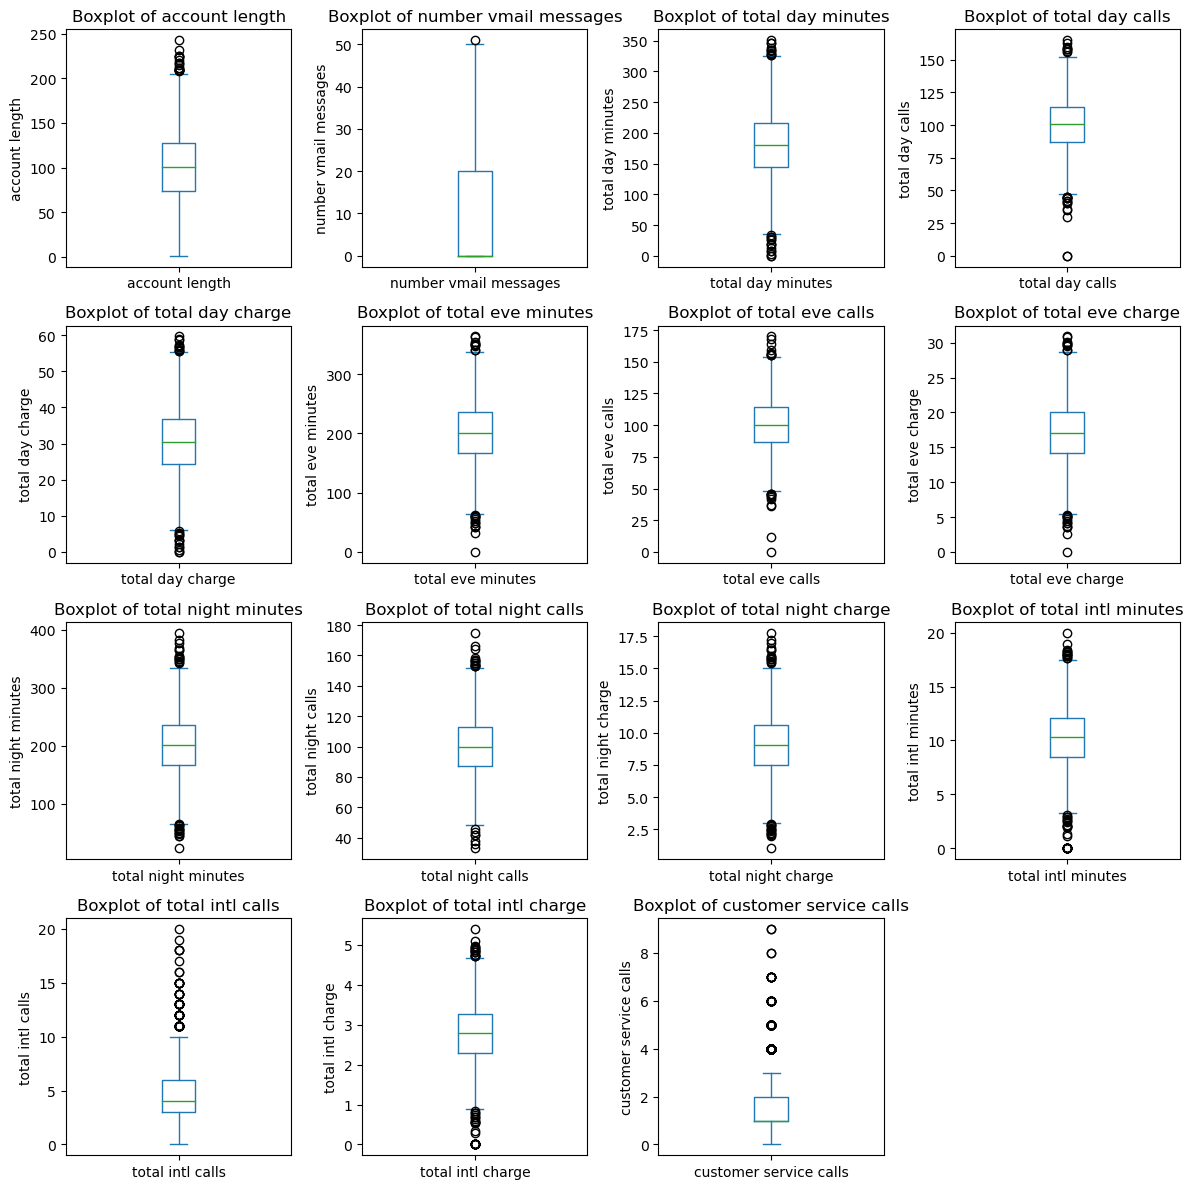

In [203]:
# checking for outliers in numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
num_plots = len(numeric_cols.columns)
num_rows = (num_plots + 3) // 4 # 4 columns
num_cols = min(num_plots, 4)  

plt.figure(figsize=(12, 3 * num_rows))

for i, col in enumerate(numeric_cols.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    data[col].plot(kind='box')
    plt.title(f'Boxplot of {col}')  # Set title
    plt.ylabel(col)  # Set y-label

plt.tight_layout()
plt.show()

##### From the above, it is evident that the data above is clean; contains no duplicates and have no missing data. While checking for outliers, we notice that their is no signitficant oultier.

In [204]:
# Given that the data has no missing values,the phone number column was dropped as it was only significant as a unique identifier during the cleaning process.
data.drop('phone number', axis=1, inplace=True)


### 4. Data statistics

In [205]:
# Summary statistic
data.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Explotary Data Analysis

#### Univariate Analysis

 These classification problem project seeks to predict the churn of customers. The target variable is "churn" which is a binary variable. Assesing the distribution of the target variable to see if the data is balanced or not.

In [206]:
# checking for the distribution of the target variable "churn"
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

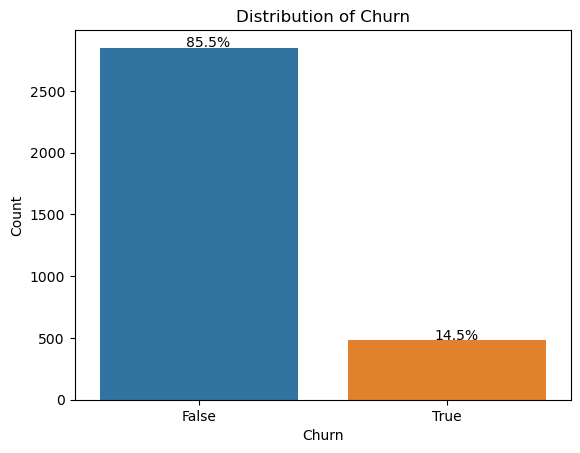

In [207]:
# Plotting the distribution of the target variable
ax = sns.countplot(x='churn', data=data)
total = len(data['churn'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

It is evident that from the 3,333 customers, 483 customers have churned from SyriaTel. This is approximately 14.5 % of the total customers indicating a loss in their customer base.
From the distribution as shown in "Distribution of churn" graph above, their is an uneven distribution of observations with 85.5% of the data belonging to the False class while 14.5% belonging to the true class.

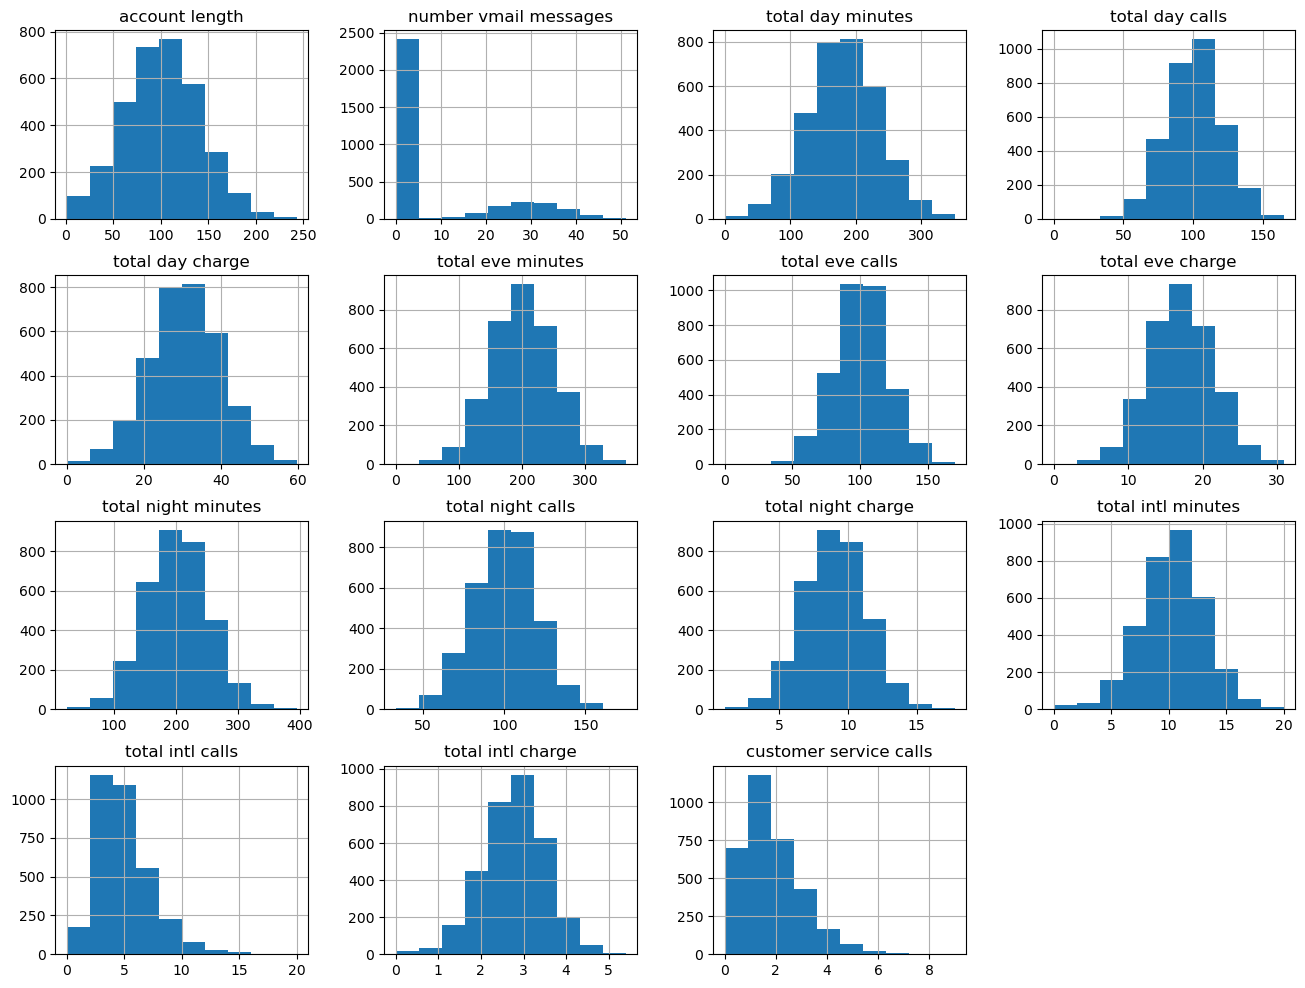

In [208]:
# distribution of features
data.drop(columns='churn').hist(figsize=(16,12));

### Multivariate analysis

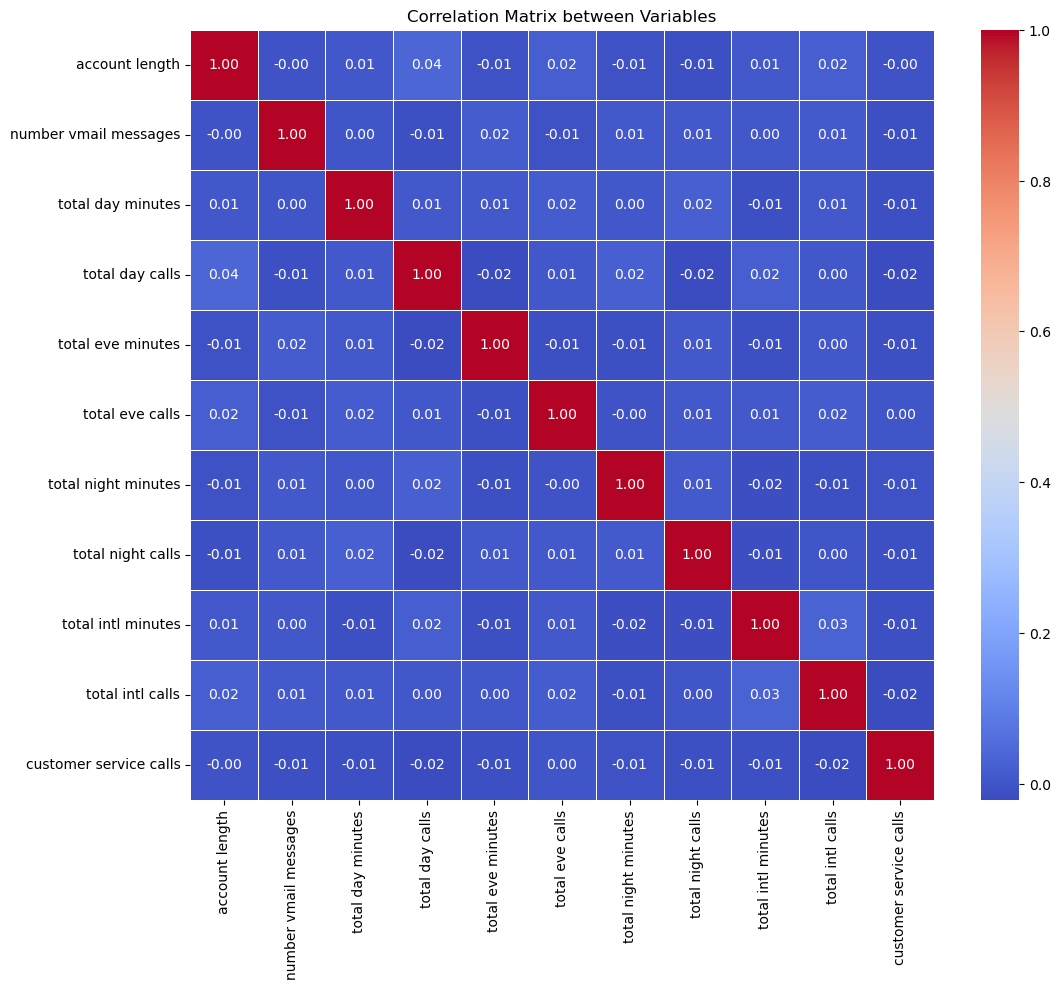

In [221]:
# Compute the correlation matric for the numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr_matrix = data[numeric_columns].corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show()

While most of the features in the dataset do not show significant correlation, there are some pairs of features that exhibit perfect positive correlation. This are:
- Total day charge and Total day minutes,
- Total eve charge and Total eve minutes,
- Total night charge and Total night minutes,
- Total int charge and Total int minutes.



### Data preparation

In [222]:
columns_to_drop = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


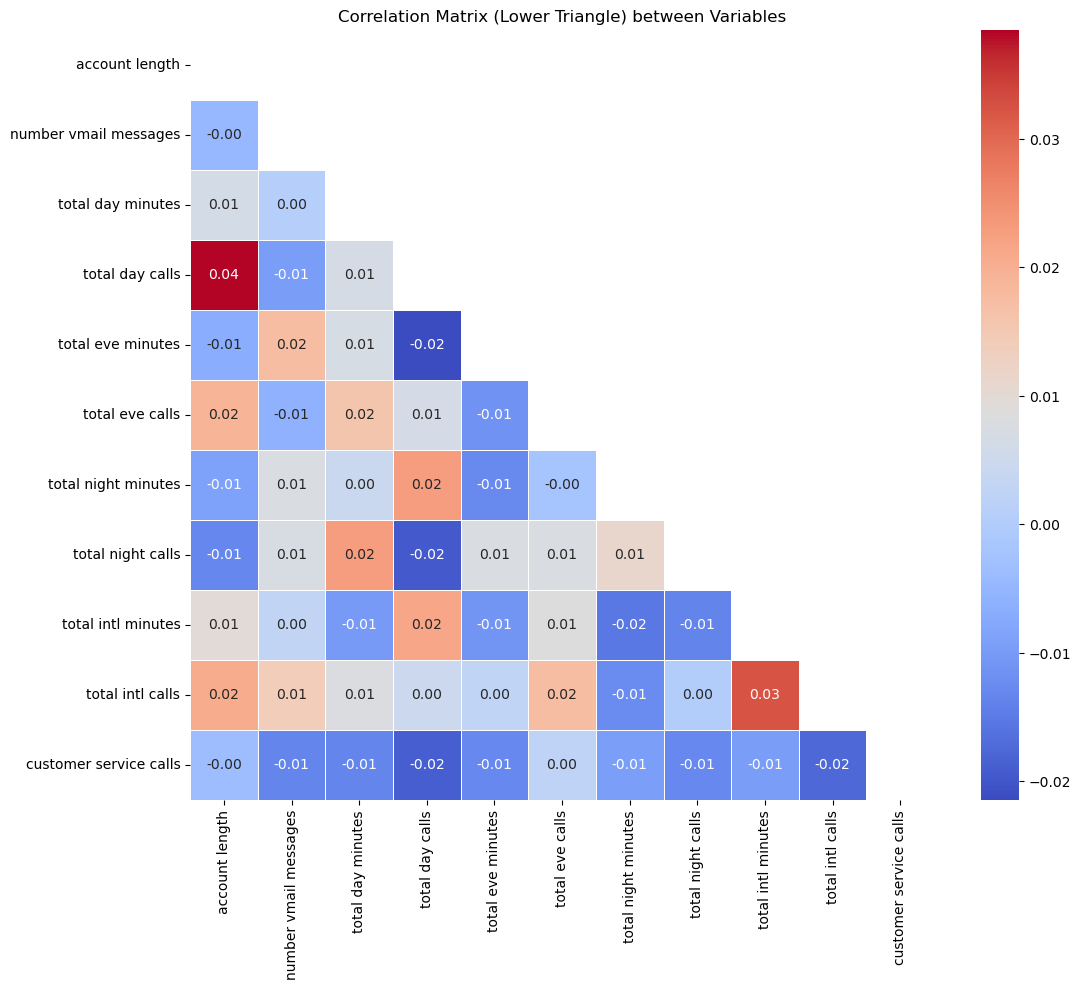

In [223]:
# Compute the correlation matrix
corr_matrix = data[numeric_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix (Lower Triangle) between Variables')
plt.show()

Checking the multicollinearity of the data, it is evident that the correlation between the variables are now acceptable as they are negligible.


### Train-test split

In [225]:
# Defining the target variable(y) and the independent variables(x).
y = data['churn']
X = data.drop(['churn'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Normalizing the data

In [232]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 367 to 3174
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2499 non-null   object 
 1   account length          2499 non-null   int64  
 2   area code               2499 non-null   object 
 3   international plan      2499 non-null   object 
 4   voice mail plan         2499 non-null   object 
 5   number vmail messages   2499 non-null   int64  
 6   total day minutes       2499 non-null   float64
 7   total day calls         2499 non-null   int64  
 8   total eve minutes       2499 non-null   float64
 9   total eve calls         2499 non-null   int64  
 10  total night minutes     2499 non-null   float64
 11  total night calls       2499 non-null   int64  
 12  total intl minutes      2499 non-null   float64
 13  total intl calls        2499 non-null   int64  
 14  customer service calls  2499 non-null   int

In [234]:
# Creating dummy variables for the categorical columns
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train.head(3)

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
367,45,0,78.2,127,253.4,108,255.0,100,18.0,3,...,False,False,False,False,False,False,True,False,False,False
3103,115,0,195.9,111,227.0,108,313.2,113,13.2,1,...,False,False,False,False,False,False,True,False,False,False
549,121,31,237.1,63,205.6,117,196.7,85,10.1,5,...,False,False,False,False,False,False,False,False,False,True


In [301]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_train .head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,-1.404508,-0.584700,-1.883677,1.330852,1.037727,0.401340,1.069609,0.004940,2.768109,-0.595235,...,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,1.001201,-0.570111,-0.327448,-0.611418
1,0.366388,-0.584700,0.294083,0.529165,0.516178,0.401340,2.214376,0.670832,1.051970,-1.417963,...,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,1.001201,-0.570111,-0.327448,-0.611418
2,0.518179,1.685101,1.056392,-1.875896,0.093407,0.849774,-0.077125,-0.763398,-0.056369,0.227493,...,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.998800,-0.570111,-0.327448,1.635543
3,2.010792,-0.584700,-0.679156,1.681590,-0.402459,0.650470,-0.322994,-0.660953,-0.056369,-0.183871,...,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,1.001201,-0.570111,-0.327448,-0.611418
4,0.290493,-0.584700,0.484660,1.080325,-0.718549,-0.296224,-1.186487,0.056162,0.837453,1.050221,...,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.998800,1.754044,-0.327448,-0.611418


### Dealing with class imbalance for the training data

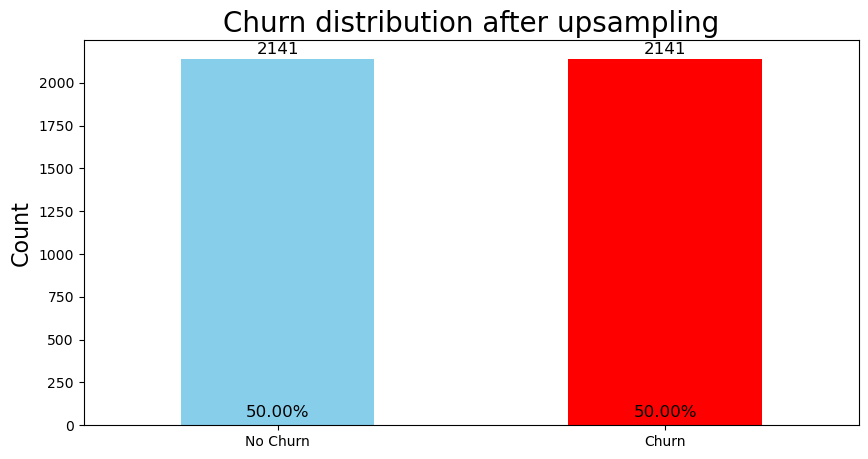

In [245]:
# Upsample minority class
X_train_minority = X_train[y_train == True]
X_train_majority = X_train[y_train == False]

X_train_minority_upsampled = resample(X_train_minority,
                                      replace=True,     # sample with replacement
                                      n_samples=len(X_train_majority),   # match number in majority class
                                      random_state=123) # reproducible results

# Combine majority class with upsampled minority class
X_train_resampled = pd.concat([X_train_majority, X_train_minority_upsampled])
y_train_resampled = pd.Series([False] * len(X_train_majority) + [True] * len(X_train_minority_upsampled))

# Count the occurrences of each class after upsampling
class_counts = y_train_resampled.value_counts()

# Calculate percentages
class_percentages = class_counts / len(y_train_resampled) * 100

# Plot class distribution after upsampling
fig, ax = plt.subplots(figsize=(10, 5))
bars = class_counts.plot(kind='bar', color=['skyblue', 'red'], ax=ax)

# Add counts on the side of each bar
for i, count in enumerate(class_counts):
    ax.text(i, count + 10, f'{count}', va='bottom', ha='center', fontsize=12)

# Add percentages on top of each bar
for i, percentage in enumerate(class_percentages):
    ax.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=12)

# Add labels and title
ax.set_ylabel('Count', fontsize=16)
ax.set_xticklabels(['No Churn', 'Churn'], rotation=0)  # Set x-axis labels
ax.set_title('Churn distribution after upsampling', fontsize=20)

# Show plot
plt.show()


In [ ]:
# Checking that the test data is not affected by the upsampling.
y_test.value_counts()

churn
False    723
True     111
Name: count, dtype: int64

## 6. MODELLING

### BASELINE MODEL: Logistic regression

In [302]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [287]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [288]:
# Checking the classifier accuracy on training set.
residuals = np.abs(y_train ^ y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))


churn
False    2171
True      328
Name: count, dtype: int64
------------------------------------
churn
False    0.868747
True     0.131253
Name: proportion, dtype: float64


In [289]:
# Checking the classifier accuracy on test set.
residuals = np.abs(y_test ^ y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

churn
False    701
True     133
Name: count, dtype: int64
------------------------------------
churn
False    0.840528
True     0.159472
Name: proportion, dtype: float64


In [290]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

{'TP': 17, 'TN': 684, 'FP': 25, 'FN': 108}

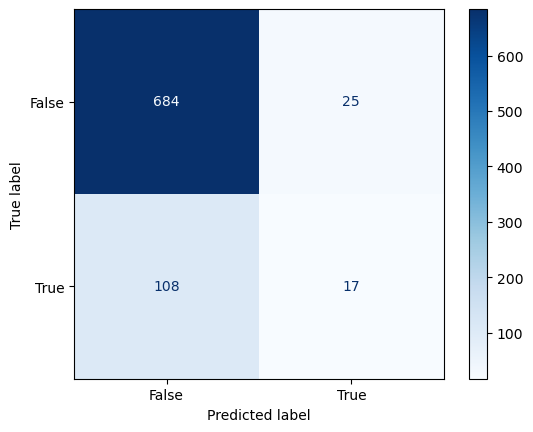

In [291]:
# Visualize the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)

In [275]:
# Model Evalauation.
print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')
print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')
print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')
print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.6136363636363636
Testing Precision:  0.40476190476190477



Training Recall:  0.22625698324022347
Testing Recall:  0.136



Training Accuracy:  0.8687474989995998
Testing Accuracy:  0.8405275779376499



Training F1-Score:  0.3306122448979592
Testing F1-Score:  0.20359281437125748


### MODEL 2: K - Nearest Neighbors

In [321]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(X_test)

In [322]:
#Evaluating the model
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.17422867513611615
Recall Score: 0.768
Accuracy Score: 0.4196642685851319
F1 Score: 0.28402366863905326


In [323]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    

find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 1
F1-Score: 0.2647058823529412


In [320]:
# Accuracy on the training set
train_accuracy = accuracy_score(y_train, train_preds)
print("Training Set Accuracy:", train_accuracy)


ValueError: Found input variables with inconsistent numbers of samples: [2499, 834]

### 3. Decision trees

In [331]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=10)

In [332]:
# Make predictions for test data
y_pred = classifier.predict(X_test)  

In [333]:
from sklearn.metrics import roc_curve, auc
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :91.84652278177458

AUC is :0.84

Confusion Matrix
----------------


Predicted,False,True,All
True,,,
False,674,35,709
True,33,92,125
All,707,127,834


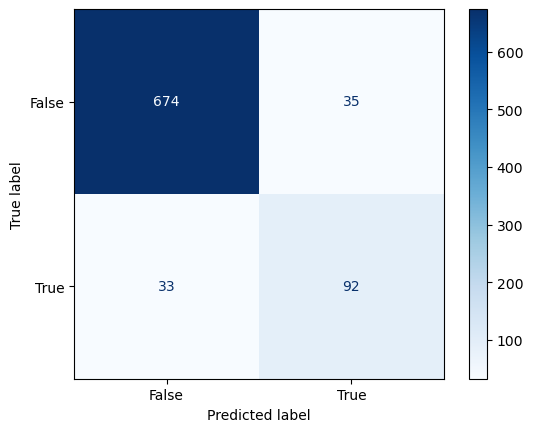

In [334]:
# Alternative confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
# Regrow the tree using entropy

In [335]:
# Instantiate and fit a DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier_2.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=10)

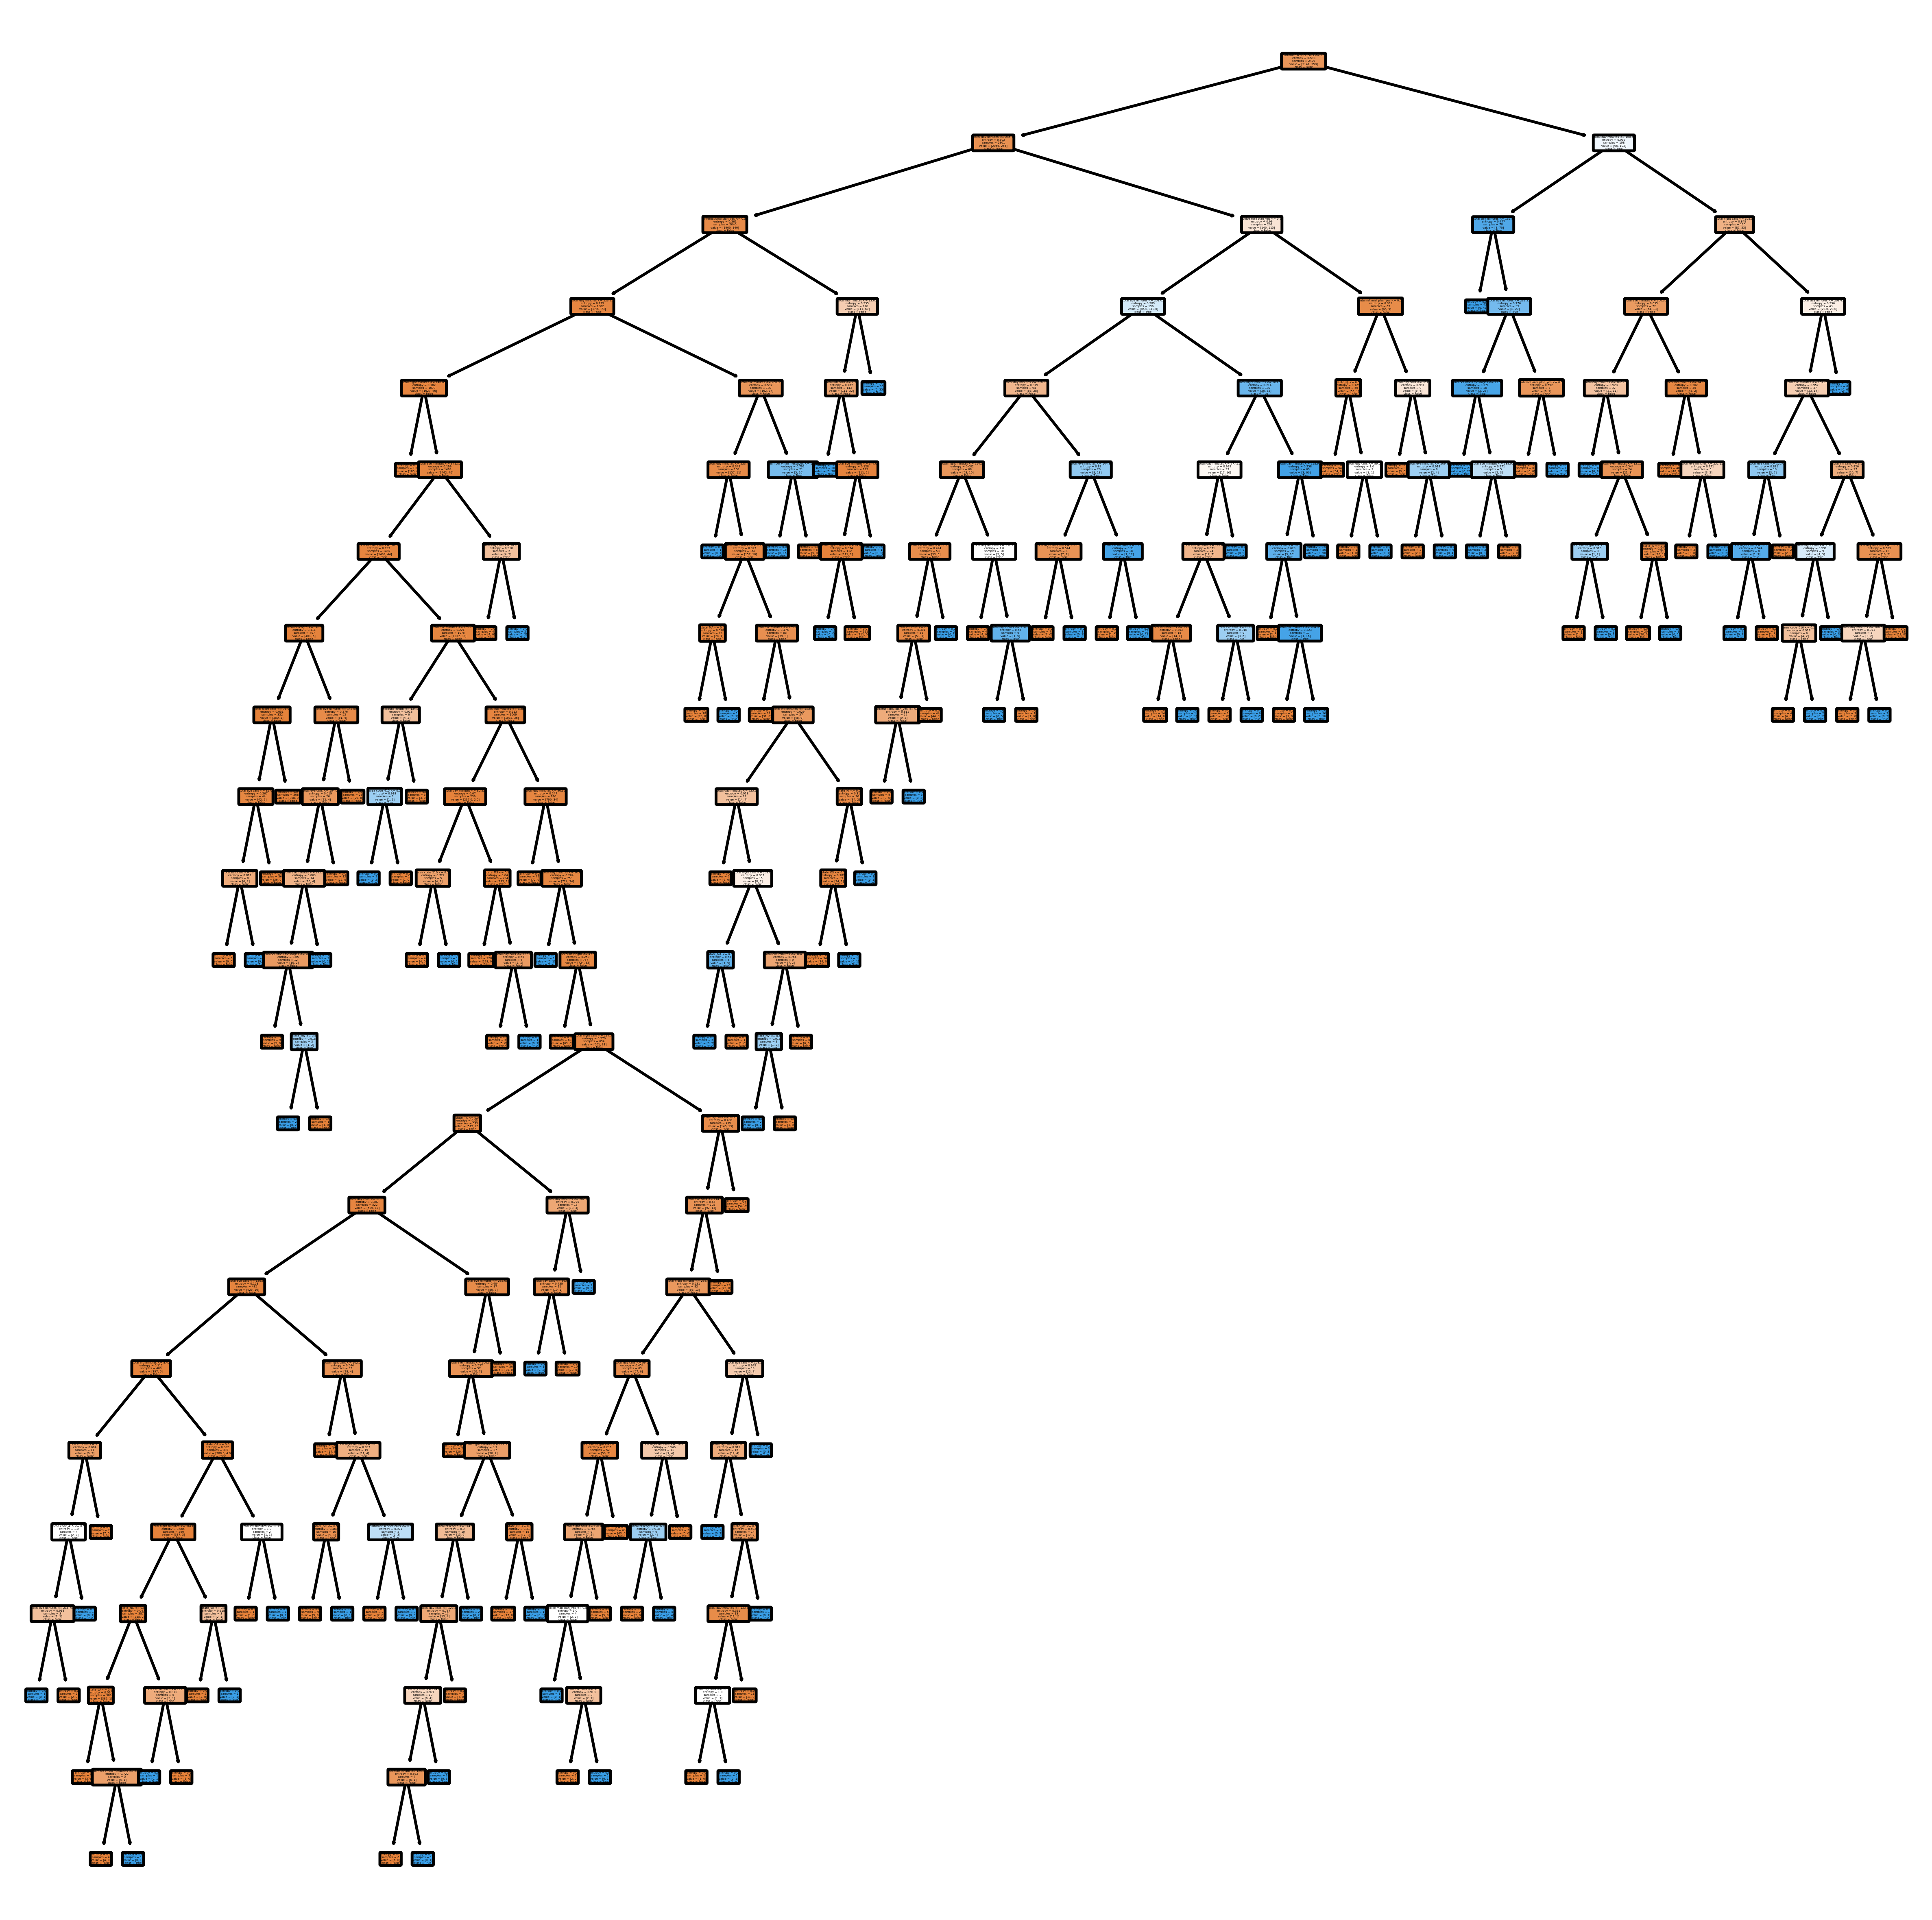

In [337]:
from sklearn import tree
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

### MODEL 4: Random Forest Classifier